# Scipy

In [66]:
from scipy import linalg
from scipy import fftpack
import scipy as sp
import numpy as np

In [3]:
y = np.arange(2**16)
len(y)

65536

In [6]:
Y = sp.fft(y)

In [7]:
Y

array([ 2.14745088e+09+0.00000000e+00j, -3.27680000e+04+6.83565275e+08j,
       -3.27680000e+04+3.41782637e+08j, ...,
       -3.27680000e+04-2.27855090e+08j, -3.27680000e+04-3.41782637e+08j,
       -3.27680000e+04-6.83565275e+08j])

In [10]:
a = np.array([[1,2],[3,4]]) #行列式
linalg.det(a)

-2.0

In [11]:
a = np.array([[1,2],[3,4]])
ia = linalg.inv(a) #逆行列
ia

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [13]:
ia @ a #検算すると微妙に誤差があることがわかる

array([[1.00000000e+00, 0.00000000e+00],
       [2.22044605e-16, 1.00000000e+00]])

# PCA

In [15]:
# 分散共分散行列を固有値分解し、最大固有値に対応する固有ベクトルを求める

In [20]:
#分散共分散行列
X = np.array([[1,2,3,4,5],[10,12,14,16,18]])
V = np.cov(X) # (X @ X.T) / (5-1) でも求まる？
V2 = (X @ X.T) / (5-1)
print(V)
print(V2)

[[ 2.5  5. ]
 [ 5.  10. ]]
[[ 13.75  57.5 ]
 [ 57.5  255.  ]]


In [24]:
eigval, eigvec = linalg.eigh(V)
print(eigval)
print(eigvec)

[ 0.  12.5]
[[-0.89442719  0.4472136 ]
 [ 0.4472136   0.89442719]]


In [26]:
eigvec[:,1]

array([0.4472136 , 0.89442719])

In [29]:
eigvec[:,1][1] #yに進む
eigvec[:,0][0] #xに進む

-0.8944271909999159

In [28]:
# 傾きaは固有値分解から求まる
a = eigvec[:,1][1] / eigvec[:,0][0]
a

-1.0

In [33]:
import matplotlib.pyplot as plt

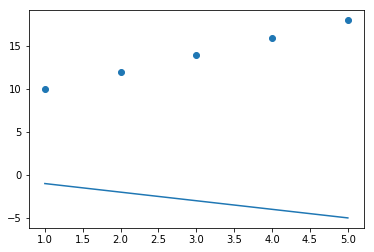

In [34]:
plt.scatter(X[0,:],X[1,:])
plt.plot(X[0,:],X[0,:]*a)

# 信号解析

In [35]:
#フーリエ解析する
#信号yをフーリエ変換したものをYとして、｜Y|（パワースペクトル）をプロットする

In [114]:
#疑似的な信号の生成
dt = 0.02 #サンプリング間隔
t = np.arange(0., 10., dt) #10秒間のサンプル
f = 5.0 #信号の周波数を5.0Hzとする
sig = np.sin(2*np.pi*f*t) #正弦波を生成
noise = 0.5 * np.random.randn(t.size) #ホワイトノイズを生成。信号強度は2:1
y = sig + noise

In [115]:
t.size

500

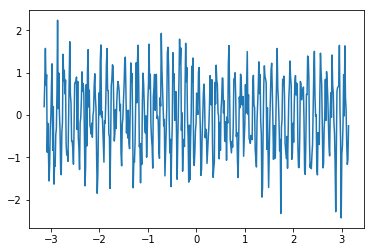

In [116]:
x = np.linspace(-np.pi, np.pi, t.size)
plt.plot(x, y)

In [117]:
Y = sp.fft(y) #離散フーリエ変換

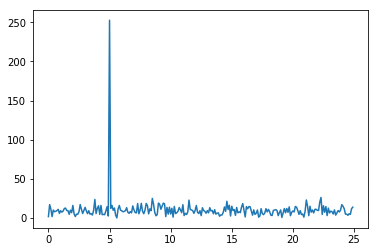

In [118]:
freqs = sp.fftpack.fftfreq(Y.size, d=dt) #サンプリング周波数を与えて周波数軸を生成
idx = np.where(freq>=0) #正の周波数帯のみ抽出するファンシーインデックス
plt.plot(freqs[idx], np.abs(Y[idx]))

In [119]:
#周波数フィルタリング
#信号らしい領域を抜き出す（上記では4-6Hz）

In [120]:
#4-6Hz以外の帯域はすべてフィルタリングして0に落とす
pidx = (freqs < 4.) | (freqs > 6.)
nidx = (freqs < -6.) | (freqs > -4.)

In [121]:
pidx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [122]:
YY = Y.copy()
YY[pidx & nidx] = 0. #pidx,nidxに該当する要素を0クリア
yy = sp.ifft(YY).real #逆フーリエ変換で信号をもとに戻す（複素数なので実部を取り出す）

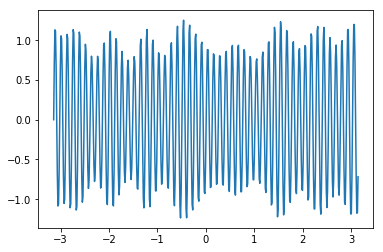

In [123]:
plt.plot(x, yy)

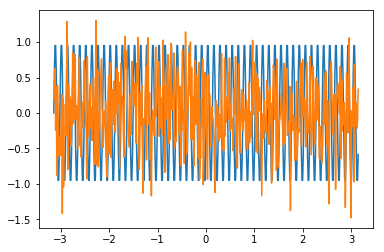

In [124]:
plt.plot(x, sig)
plt.plot(x, noise)